In [1]:
import numpy as np
from dtw import *
import csv
import glob
import os
import pandas as pd
import fastdtw
from scipy.spatial.distance import euclidean
# import dtaidistance
# from dtaidistance import dtw_visualisation as dtwvis
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import lfilter, savgol_filter
from sklearn.preprocessing import normalize



Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
# path = "D:\\Tianyu\\code\\python\\paper2\data\VR Perform\\"
# all_text_files = glob.glob(path + '*.csv')

In [3]:
# for file_index,file in enumerate(all_text_files):
#     print(file_index,file)
# print(len(all_text_files))

In [2]:
with open('D:\\code\\python\\data\\1_HMD.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    #if reader.line_num == 1:
    #    continue
    rows= [row for row in reader]

# print (rows)
rows=np.array(rows)
print("out0=",type(rows),rows.shape)
# print("out1=",rows)
rows = np.delete(rows,0,axis=0)
print("out1=",rows)




out0= <class 'numpy.ndarray'> (8537, 49)
out1= [['0' '0' '0' ... '0' '0' '']
 ['1' '0' '0' ... '0' '0' '']
 ['2' '0' '0' ... '0' '0' '']
 ...
 ['8533' '0' '0' ... 'NaN' 'NaN' '']
 ['8534' '0' '0' ... 'NaN' 'NaN' '']
 ['8535' '0' '0' ... 'NaN' 'NaN' '']]


In [3]:
gazePX = rows[:,4].astype(np.float)
# gazePY = rows[:,5].astype(np.float)
# gazePZ = rows[:,6].astype(np.float)

# LhandPX = rows[:,16].astype(np.float)
# LhandPY = rows[:,17].astype(np.float)
# LhandPZ = rows[:,18].astype(np.float)
# LhandRX = rows[:,19].astype(np.float)
# LhandRY = rows[:,20].astype(np.float)
# LhandRZ = rows[:,21].astype(np.float)

RhandPX = rows[:,22].astype(np.float)
# RhandPY = rows[:,23].astype(np.float)
# RhandPZ = rows[:,24].astype(np.float)
# RhandRX = rows[:,25].astype(np.float)
# RhandRY = rows[:,26].astype(np.float)
# RhandRZ = rows[:,27].astype(np.float)

In [4]:
print(LhandPY)
print(gazePY.shape)

[1.292539  1.292539  1.292661  ... 0.8261313 0.8261313 0.8261313]
(8536,)


In [4]:
gazePXs = gazePX[200:7500]
# gazePYs = gazePY[200:7500]
# gazePZs = gazePZ[200:7500]
RhandPXs = RhandPX[200:7500]
# RhandPYs = RhandPY[200:7500]
# RhandPZs = RhandPZ[200:7500]
# gazePs = np.array([gazePXs,gazePYs,gazePZs],dtype=float)
# RhandPs = np.array([RhandPXs,RhandPYs,RhandPZs],dtype=float)
# gazePs = np.array([gazePXs,gazePYs],dtype=float)
# RhandPs = np.array([RhandPXs,RhandPYs],dtype=float)
# np.reshape(gazePXs,len(gazePXs))
# np.reshape(RhandPXs,len(RhandPXs))
# gazePXs = gazePX[400:500]
# RhandPXs = RhandPX[400:500]

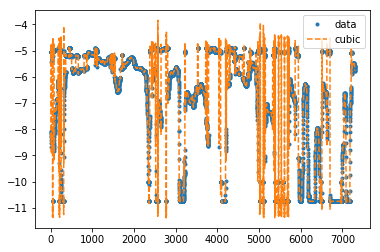

In [70]:
data_num = 7300
x = np.linspace(0, data_num-1, num=data_num, endpoint=True)
y = gazePZ[200:7500]

f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, data_num-1, num=data_num*2.5, endpoint=True)
plt.plot(x, y, '.',xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

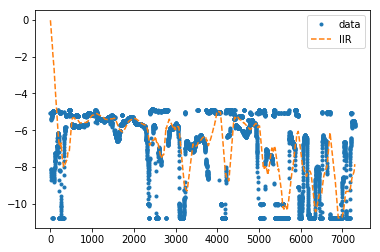

In [77]:
n = 200 # the larger n is, the smoother curve will be
b = [1.0/n]*n
a = 1
y1 = lfilter(b,a,y)
plt.plot(x, y, '.',x , y1, '--')
plt.legend(['data', 'IIR'], loc='best')
plt.show()

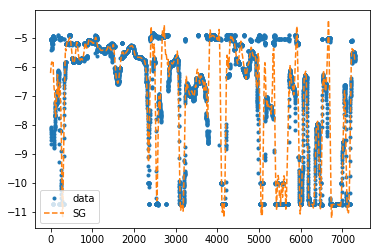

In [83]:
n = 101
y2 = savgol_filter(y, n, 2)
plt.plot(x, y, '.',x , y2, '--')
plt.legend(['data', 'SG'], loc='best')
plt.show()

In [71]:
print(f2(xnew))
print(f2(xnew).shape)

[-5.046208   -5.04550298 -5.04494063 ... -5.76712249 -5.77310208
 -5.777316  ]
(18250,)


In [8]:
alignment = dtw(y2, RhandPZs.T, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c"))
alignment.plot(type="threeway")

NameError: name 'y2' is not defined

In [5]:
Y = scipy.spatial.distance.cdist(gazePs.T,RhandPs.T)

In [6]:
print(Y)
print(Y.shape)

[[0.970945   0.97123175 0.97174673 ... 1.00954977 1.01059565 1.01373829]
 [0.975508   0.9757789  0.97627572 ... 1.0177581  1.01880852 1.02195552]
 [0.98027747 0.98053482 0.98101609 ... 1.02493313 1.02598881 1.02914285]
 ...
 [2.06479156 2.06562719 2.06671477 ... 1.06264759 1.0639751  1.06707438]
 [2.08186441 2.08270567 2.08380026 ... 1.07842168 1.07975814 1.08289654]
 [2.09224004 2.0930839  2.09418187 ... 1.08834617 1.08968898 1.09285283]]
(7300, 7300)


In [7]:
print(gazePs.shape)
print(RhandPs.shape)


(3, 7300)
(3, 7300)


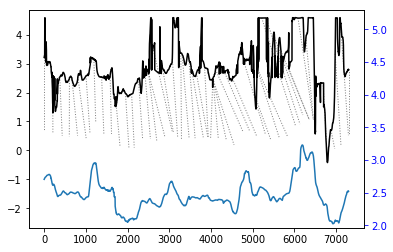

In [8]:
dtw(gazePXs.T, RhandPXs.T, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

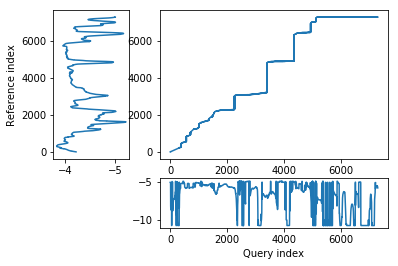

In [43]:
dtw(gazePZs.T, RhandPZs.T, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="threeway",offset=-2)

In [5]:
alignment = dtw(gazePZs.T, RhandPZs.T, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))


In [100]:
alignment.index1s

array([   0,    1,    2, ..., 7297, 7298, 7299])

In [51]:
print(alignment.costMatrix.shape)

(7300, 7300)


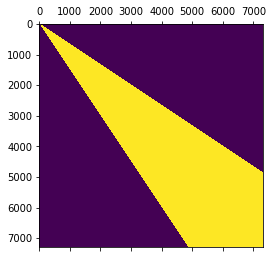

In [57]:
plt.matshow(alignment.directionMatrix)

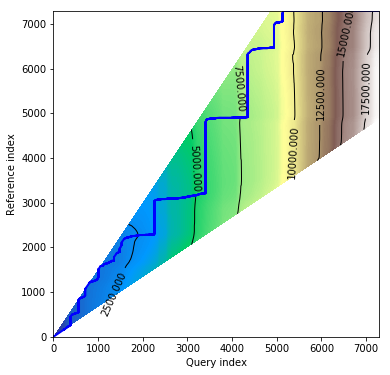

In [54]:
dtwPlotDensity(alignment)

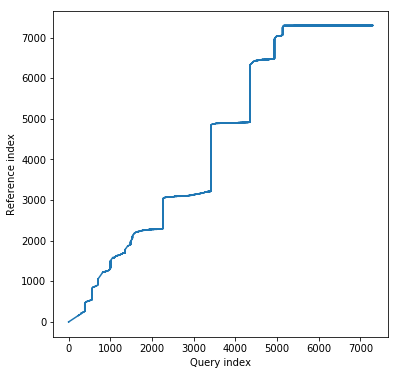

In [62]:
dtwPlotAlignment(alignment)

In [6]:
alignment = dtw(gazePZs.T, RhandPZs.T, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))
x = alignment.index1s
y = alignment.index2s

In [17]:
x_new = []
y_new = []
x_new.append(x[0])
y_new.append(y[0])
for i in range(len(x)-1):
    if x[i+1]!=x[i]:
        x_new.append(x[i+1])
        y_new.append(y[i+1])
x_new = np.array(x_new)
y_new = np.array(y_new)

In [11]:
D2R = np.pi/180
x_new = x*np.cos(-45*D2R) - y*np.sin(-45*D2R)
y_new = x*np.sin(-45*D2R) + y*np.cos(-45*D2R)

In [14]:
print(len(x))
print(len(y))
print(len(x_new))
print(len(y_new))

13152
13152
7300
7300


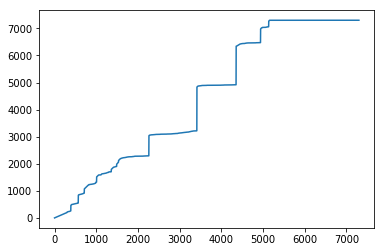

In [18]:
plt.plot(x_new,y_new)

array([0.00000000e+00, 1.41421356e+00, 2.82842712e+00, ...,
       1.03209306e+04, 1.03216377e+04, 1.03223448e+04])

In [104]:
len(x)

13152

In [112]:
n = 20
diff = [None] * (len(x)-1)
avgdiff = [None] * (len(x)-1-n)
for i in range(len(x)-1):
    diff[i] = (y[i+1] - y[i])/(x[i+1] - x[i])
for j in range(len(x)-1-n):
    avgdiff[j] = sum(diff[j:j+20])/n


D:\Tianyu\software\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """


In [117]:
diff = np.array(diff)
avgdiff = np.array(avgdiff)
diff.shape

(13151,)

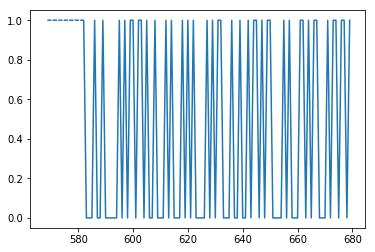

In [128]:
# plt.plot(x[0:len(diff)],diff)
plt.plot(x[1000:1200],diff[1000:1200])

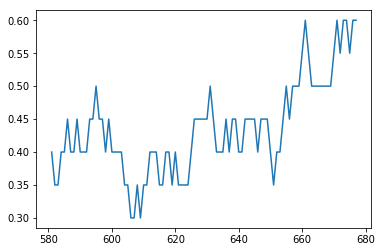

In [129]:
# plt.plot(x[0:len(avgdiff)],avgdiff)
plt.plot(x[1000:1200],avgdiff[1000:1200])

In [119]:
Sec_diff = [None] * (len(diff)-1)
Sec_avgdiff = [None] * (len(diff)-1-n)
for i in range(len(diff)-1):
    Sec_diff[i] = (diff[i+1] - diff[i])/(x[i+1] - x[i])
for j in range(len(diff)-1-n):
    Sec_avgdiff[j] = sum(Sec_diff[j:j+20])/n

D:\Tianyu\software\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
D:\Tianyu\software\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [127]:
Sec_diff = np.array(Sec_diff)
Sec_diff

array([ 0., -1.,  1., ...,  0.,  0.,  0.])

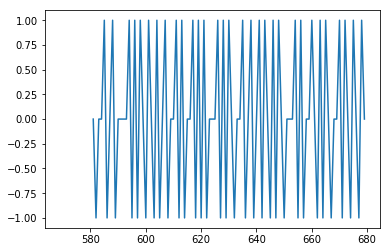

In [130]:
# plt.plot(x[0:len(Sec_diff)],Sec_diff)
plt.plot(x[1000:1200],Sec_diff[1000:1200])

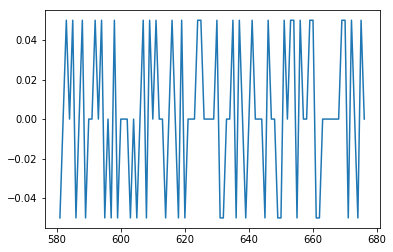

In [131]:
# plt.plot(x[0:len(Sec_avgdiff)],Sec_avgdiff)
plt.plot(x[1000:1200],Sec_avgdiff[1000:1200])

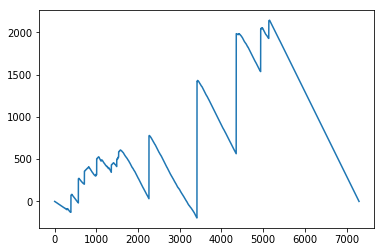

In [132]:
# Normalized
y_new = [None] * len(x)
for i in range(len(x)):
    y_new[i] = y[i] - x[i]
plt.plot(x,y_new)

In [137]:
n = 20
avg = [None] * (len(x)-n)
std = [None] * (len(x)-n)
SI = [None] * (len(x)-n)
for i in range(len(x)-n):
    avg[i] = np.average(y_new[i:i+20])
    std[i] = np.std(y_new[i:i+20])
    SI[i] = std[i]/avg[i]

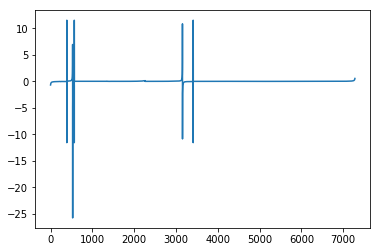

In [170]:
plt.plot(x[0:len(avg)],SI)

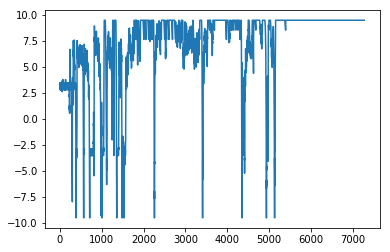

In [143]:
y_new = np.array(y_new)
plt.plot(x[0:len(avg)],y_new[0:len(avg)] - avg)

In [158]:
# norm1 = normalize(y[:np.newaxis],axis=0).ravel()
norm1 = y_new / np.linalg.norm(y_new)

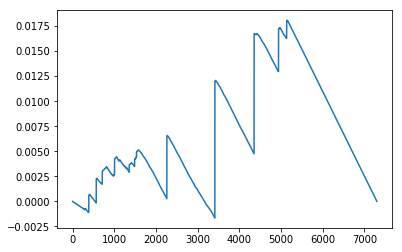

In [159]:
plt.plot(x,norm1)

In [165]:
norm2 = normalize(y_new.reshape(-1,1),axis=0)

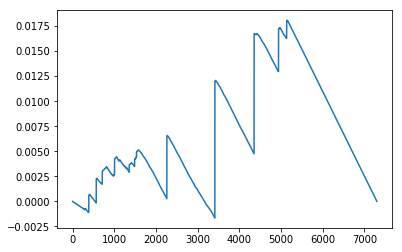

In [166]:
plt.plot(x,norm2)

In [153]:
x = np.random.rand(1000)*10
norm1 = x / np.linalg.norm(x)
norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
print(np.all(norm1 == norm2))

False


In [167]:
n = 20
avg = [None] * (len(x)-n)
std = [None] * (len(x)-n)
SI = [None] * (len(x)-n)
for i in range(len(x)-n):
    avg[i] = np.average(norm1[i:i+20])
    std[i] = np.std(norm1[i:i+20])
    SI[i] = std[i]/avg[i]

In [37]:
alignment.localCostMatrix

array([[0.505118, 0.503989, 0.502792, ..., 0.683617, 0.685013, 0.688246],
       [0.516097, 0.514968, 0.513771, ..., 0.694596, 0.695992, 0.699225],
       [0.526025, 0.524896, 0.523699, ..., 0.704524, 0.70592 , 0.709153],
       ...,
       [0.092   , 0.090871, 0.089674, ..., 0.270499, 0.271895, 0.275128],
       [0.090138, 0.089009, 0.087812, ..., 0.268637, 0.270033, 0.273266],
       [0.090297, 0.089168, 0.087971, ..., 0.268796, 0.270192, 0.273425]])

In [105]:
gazePXs = np.array([[0,1,2],[3,4,5],[6,7,8]],dtype=float)
RhandPXs = np.array([[0,1,2],[3,4,5],[6,7,8]],dtype=float)

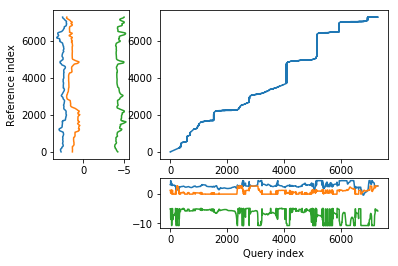

In [10]:
alignment = dtw(gazePs.T, RhandPs.T, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c"))
alignment.plot(type="threeway")


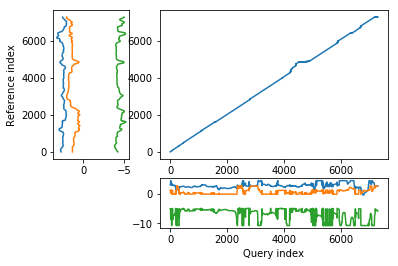

In [116]:
alignment = dtw(gazePs.T, RhandPs.T, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "b"))
alignment.plot(type="threeway")

In [14]:
print(alignment.shape)

AttributeError: 'DTW' object has no attribute 'shape'

In [131]:
idx = np.linspace(0,6.28,num=100)
# query = np.sin(idx) + np.random.uniform(size=100)-0.5
query = np.random.uniform(-1,1,100)
template = np.cos(idx)

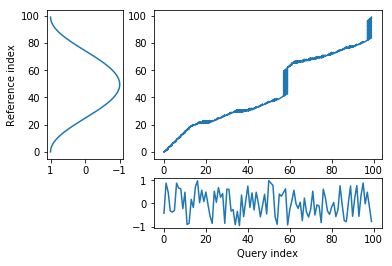

In [133]:
alignment = dtw(query, template, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c"))
alignment.plot(type="threeway")


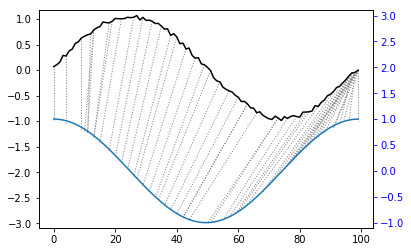

In [112]:
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "b"))\
    .plot(type="twoway",offset=-2)


In [44]:
distance, path = fastdtw.fastdtw(gazePs.T, RhandPs.T,dist=euclidean)

In [30]:
print(distance)

20592.448925801542


In [57]:
path = dtaidistance.dtw.warping_path(query, template)
dtwvis.plot_warping(query, template, path, filename="warp.png")
# dtaidistance.dtw_visualisation.plot_warping
# distance = dtaidistance.dtw.distance(query, template)
# print(distance)

(None, None)

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



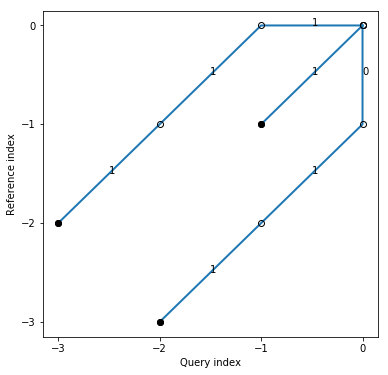

In [108]:
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()


Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] +     d[i  ,j  ] ,
 ) 

Normalization hint: NA



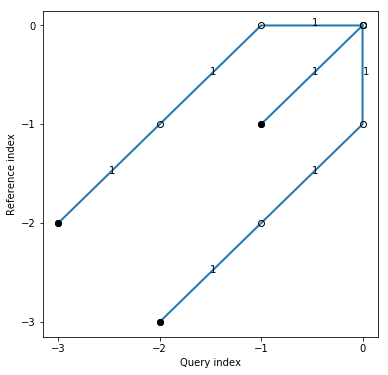

In [109]:
print(rabinerJuangStepPattern(6,"b"))
rabinerJuangStepPattern(6,"b").plot()

In [12]:
alignment = dtw(gazePXs.T, RhandPXs.T, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))
x = alignment.index1s
y = alignment.index2s

MemoryError: Unable to allocate 407. MiB for an array with shape (7300, 7300) and data type float64

In [6]:
x_new = []
y_new = []
x_new.append(x[0])
y_new.append(y[0])
for i in range(len(x)-1):
    if x[i+1]!=x[i]:
        x_new.append(x[i+1])
        y_new.append(y[i+1])
x_new = np.array(x_new)
y_new = np.array(y_new)

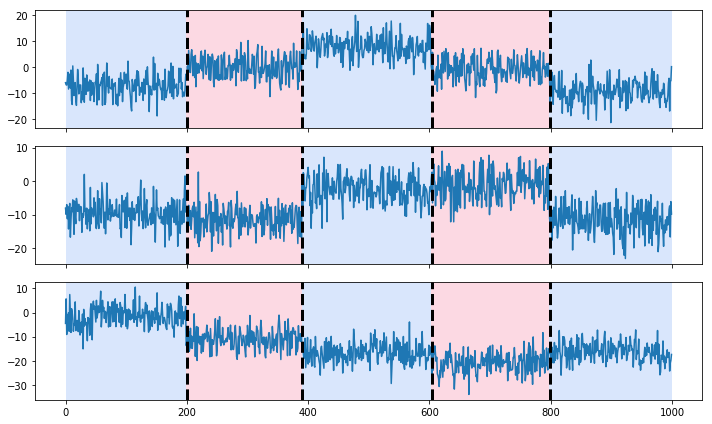

In [7]:
import matplotlib.pyplot as plt
import ruptures as rpt
rpt.datasets.pw_constant
# generate signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.datasets.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, bkps, result)
plt.show()

In [11]:
print(signal)
print(signal.shape)

[[ -5.13238151   7.41435886   8.25660582]
 [ -4.37887695   5.41543683   9.88961404]
 [ -4.43058439   1.66084407   9.59122727]
 ...
 [-18.65572511  14.80668716  10.66095727]
 [-12.37641803  16.45188116  14.16724641]
 [-14.78780165  20.7103852    6.30429989]]
(1000, 3)


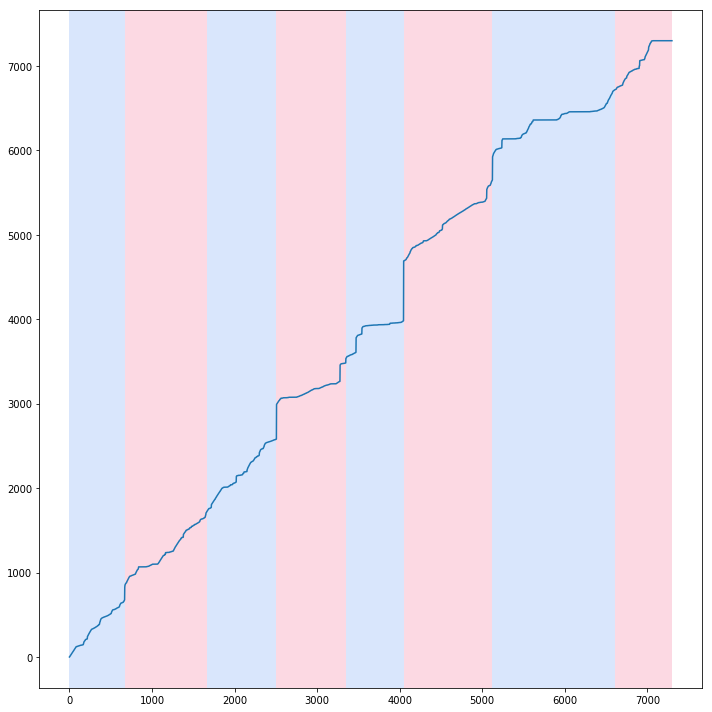

In [8]:
# detection
algo = rpt.Pelt(model="rbf").fit(y_new)
result = algo.predict(pen=30)

# display
rpt.display(y_new, result,figsize=(10,10))
plt.show()

In [9]:
print(result)

[670, 1665, 2505, 3350, 4050, 5125, 6610, 7300]


In [14]:
pattern = []
n = 0
for i in result:
    pattern[n] = [x[0:i],y[0:i]]
    n = n+1


IndexError: list assignment index out of range

In [21]:
pattern0 = [x[0:i],y[0:i]]
# pattern0 = np.array(pattern0)

In [24]:
print(pattern0)

[array([  0,   1,   2,   2,   3,   4,   4,   5,   6,   6,   7,   8,   8,
         9,  10,  10,  11,  12,  12,  13,  14,  14,  15,  16,  16,  17,
        18,  18,  19,  20,  20,  21,  22,  22,  23,  24,  24,  25,  26,
        26,  27,  28,  28,  29,  30,  30,  31,  32,  32,  33,  34,  34,
        35,  36,  36,  37,  38,  38,  39,  40,  40,  41,  42,  42,  43,
        44,  44,  45,  46,  46,  47,  48,  49,  50,  50,  50,  51,  52,
        52,  53,  54,  54,  55,  56,  57,  58,  58,  58,  59,  60,  60,
        61,  62,  62,  63,  64,  64,  65,  66,  66,  67,  68,  68,  69,
        70,  70,  71,  72,  72,  73,  74,  74,  75,  76,  76,  77,  78,
        79,  79,  80,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 1

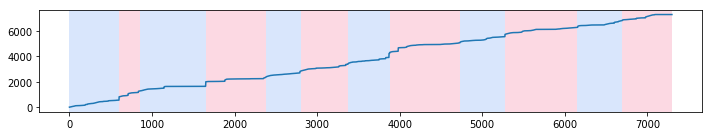

In [18]:
# detection
algo = rpt.Pelt(model="rbf").fit(y_new)
result = algo.predict(pen=10)

# display
rpt.display(y_new, result)
plt.show()

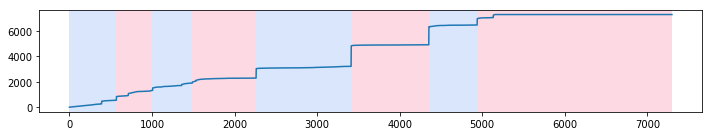

In [19]:
# detection
algo = rpt.Pelt(model="rbf").fit(y_new)
result = algo.predict(pen=10)

# display
rpt.display(y_new, result)
plt.show()

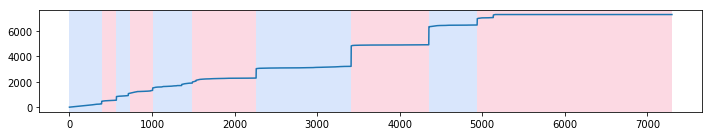

In [27]:
# detection
algo = rpt.Pelt(model="rbf").fit(y_new)
result = algo.predict(pen=1)

# display
rpt.display(y_new, result)
plt.show()

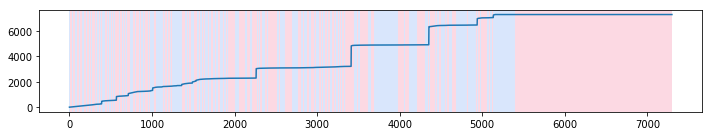

In [30]:
# detection
algo = rpt.Binseg(model="l2").fit(y_new)
result = algo.predict(pen=60)

# display
rpt.display(y_new, result)
plt.show()

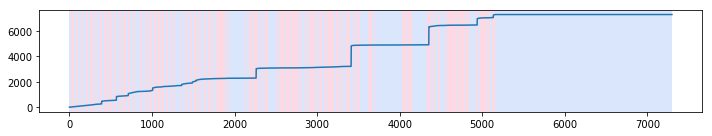

In [33]:
# detection
algo = rpt.Binseg(model="l2").fit(y_new)
result = algo.predict(epsilon=5)

# display
rpt.display(y_new, result)
plt.show()

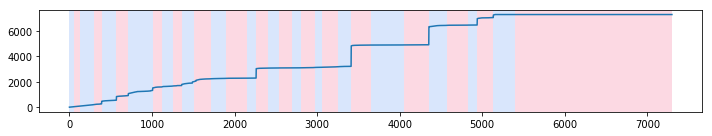

In [22]:
# detection
algo = rpt.Window(model="l2").fit(y_new)
result = algo.predict(epsilon=10)

# display
rpt.display(y_new, result)
plt.show()

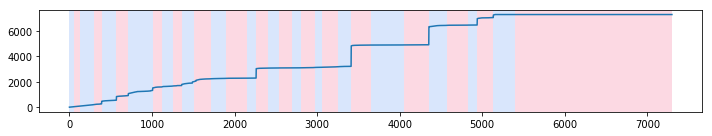

In [34]:
# detection
algo = rpt.Window(model="l2").fit(y_new)
result = algo.predict(pen=10)

# display
rpt.display(y_new, result)
plt.show()

In [23]:
# detection
algo = rpt.Dynp().fit(y_new)
result = algo.predict(n_bkps=23)

# display
rpt.display(y_new, result)
plt.show()

KeyboardInterrupt: 

In [24]:
# detection
algo = rpt.Pelt(model="rbf").fit(y_new)
result = algo.predict(pen=60)

# display
rpt.display(y_new, result)
plt.show()

KeyboardInterrupt: 

In [36]:
import changefinder
#Create a synthetic data set to test against
points=np.concatenate([np.random.rand(100)+5,
                       np.random.rand(100)+10,
                       np.random.rand(100)+5])


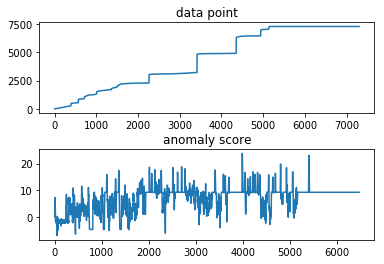

In [37]:
#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)
ax1.plot(y_new)
ax1.set_title("data point")
#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in y_new]
ax2.plot(scores)
ax2.set_title("anomaly score")
plt.show() 

In [19]:
y_s = y_new[5300:5500]

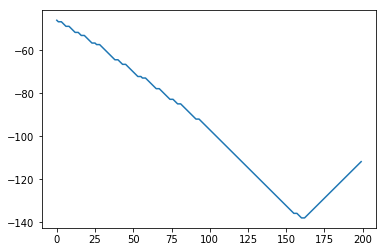

In [20]:
plt.plot(y_s)

In [38]:
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

Q, P, Pcp = offcd.offline_changepoint_detection(y_new, partial(offcd.const_prior, l=(len(y_new)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

Use scipy logsumexp().


KeyboardInterrupt: 

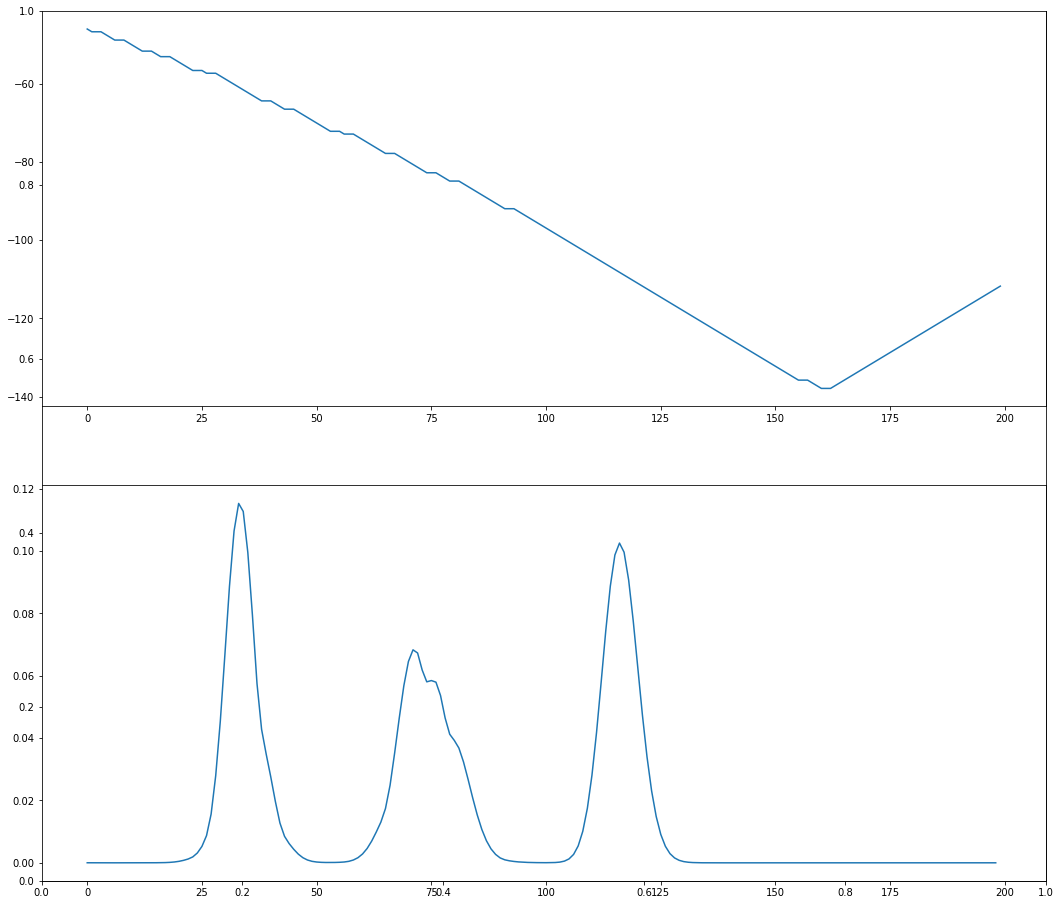

In [22]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(y_new[:])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))

In [24]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [ ]:
#######################################################################
## clustering k-means ##

In [4]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
X = random_walks(n_ts=50, sz=32, d=1)

In [19]:
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,max_iter_barycenter=5,random_state=0).fit(X)

In [22]:
y = km_dba.predict(X)

In [24]:
y.shape

(50,)

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 
DBA k-means
Init 1
0.637 -->[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
0.458 --> 0.458 

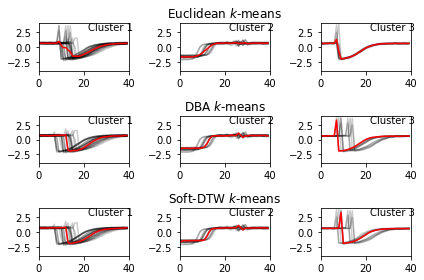

In [8]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50, 40, 1)
(100,)
(100, 275, 1)
(100,)


In [15]:
print(y_pred)

[0 0 1 0 1 0 2 0 0 1 1 1 0 0 0 1 2 0 2 1 0 1 2 0 2 1 0 1 1 2 0 2 2 0 1 2 0
 2 0 0 0 0 0 0 0 0 1 0 1 2]
